In [1]:
import pandas as pd
import data_loader as dl
import pyteomics.mzml
import seaborn as sns
import matplotlib.pyplot as plt

RDKit WARNING: [08:55:32] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def get_data_for_one(file_name):
    #Read in mzml 
    mzml_df = dl.load_mzml(file_name)
    ms1 = mzml_df[mzml_df["ms_level"]==1]
    ms2 = mzml_df[mzml_df["ms_level"]==2]
    
    #Read in psm
    mm_df = dl.load_joined_psm_mzml(file_name)
    mm_df= mm_df.sort_values("minute")
    
    #MM scan below 1% cutoff
    mm_df_cut = mm_df[mm_df['probability'] <=.01]
    
     #make df with all types
    line_df_ms1 = ms1['minute']
    line_df_ms1 = line_df_ms1.value_counts().rename_axis('minute').reset_index(name='counts')

    line_df_ms2 = ms2['minute']
    line_df_ms2 = line_df_ms2.value_counts().rename_axis('minute').reset_index(name='counts')

    line_df_mm_cut = mm_df_cut['minute']
    line_df_mm_cut = line_df_mm_cut.value_counts().rename_axis('minute').reset_index(name='counts')

    line_df = pd.merge(line_df_ms1, line_df_ms2, on='minute', how='left').fillna(method='ffill')
    line_df = line_df.rename({'counts_x': 'ms1', 'counts_y': 'ms2'}, axis=1)
    line_df = pd.merge(line_df, line_df_mm_cut, on='minute', how='left').fillna(method='ffill')
    line_df = line_df.rename({'counts': '1_percent_FDR'}, axis=1)

    #get order for minutes
    line_df = line_df.sort_values("minute")

    return (line_df)

In [3]:
def get_data_for_all_files(list_of_file_names):
    
    result = get_data_for_one(list_of_file_names[0])
    df2 = get_data_for_one(list_of_file_names[1])
    df3 = get_data_for_one(list_of_file_names[2])
    df4 = get_data_for_one(list_of_file_names[3])
    df5 = get_data_for_one(list_of_file_names[4])
    df6 = get_data_for_one(list_of_file_names[5])

    counter = 1
    result = pd.merge(result, df2, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1_x': 'ms1_'+str(1), 'ms2_x': 'ms2_'+str(1), '1_percent_FDR_x': '1_percent_FDR_'+str(1),
                           'ms1_y': 'ms1_'+str(2), 'ms2_y': 'ms2_'+str(2), '1_percent_FDR_y': '1_percent_FDR_'+str(2)}, axis=1)
    counter = 3
    result = pd.merge(result, df3, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1': 'ms1_'+str(counter), 'ms2': 'ms2_'+str(counter), '1_percent_FDR': '1_percent_FDR_'+str(counter)}, axis=1)

    counter = 4
    result = pd.merge(result, df4, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1': 'ms1_'+str(counter), 'ms2': 'ms2_'+str(counter), '1_percent_FDR': '1_percent_FDR_'+str(counter)}, axis=1)

    counter = 5
    result = pd.merge(result, df5, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1': 'ms1_'+str(counter), 'ms2': 'ms2_'+str(counter), '1_percent_FDR': '1_percent_FDR_'+str(counter)}, axis=1)

    counter = 6
    result = pd.merge(result, df6, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1': 'ms1_'+str(counter), 'ms2': 'ms2_'+str(counter), '1_percent_FDR': '1_percent_FDR_'+str(counter)}, axis=1)

    result = result.sort_values("minute")

    return(result)


In [4]:
def get_data_for_all_files_bulk(list_of_file_names):
    
    result = get_data_for_one(list_of_file_names[0])
    df2 = get_data_for_one(list_of_file_names[1])
    df3 = get_data_for_one(list_of_file_names[2])

    counter = 1
    result = pd.merge(result, df2, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1_x': 'ms1_'+str(1), 'ms2_x': 'ms2_'+str(1), '1_percent_FDR_x': '1_percent_FDR_'+str(1),
                           'ms1_y': 'ms1_'+str(2), 'ms2_y': 'ms2_'+str(2), '1_percent_FDR_y': '1_percent_FDR_'+str(2)}, axis=1)
    counter = 3
    result = pd.merge(result, df3, on='minute', how='left').fillna(method='ffill')
    result = result.rename({'ms1': 'ms1_'+str(counter), 'ms2': 'ms2_'+str(counter), '1_percent_FDR': '1_percent_FDR_'+str(counter)}, axis=1)

    result = result.sort_values("minute")

    return(result)

In [5]:
def plot_psm_over_time(df,title):
    a4_dims = (30, 8.27) #dimensions for bigger plot
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.lineplot(data=df, x="minute", y="ms1")
    sns.lineplot(data=df, x="minute", y="ms2")
    sns.lineplot(data=df, x="minute", y="1_percent_FDR")
    ax.legend(['ms1','ms2','1% cutoff'],fontsize='15')
    plt.rcParams['xtick.labelsize']=20
    plt.rcParams['ytick.labelsize']=20
    plt.title(title,fontsize='15')
#     plt.ylim(0,400)
    plt.show()

In [6]:
list_of_file_names = ['bulk_rep1', 'bulk_rep2','bulk_rep3']
all_bulk = get_data_for_all_files_bulk(list_of_file_names)

<ipython-input-6-58708af7c478>:2: DtypeWarning: Columns (12,20,21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  all_bulk = get_data_for_all_files_bulk(list_of_file_names)
<ipython-input-6-58708af7c478>:2: DtypeWarning: Columns (12,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  all_bulk = get_data_for_all_files_bulk(list_of_file_names)
<ipython-input-6-58708af7c478>:2: DtypeWarning: Columns (12,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  all_bulk = get_data_for_all_files_bulk(list_of_file_names)


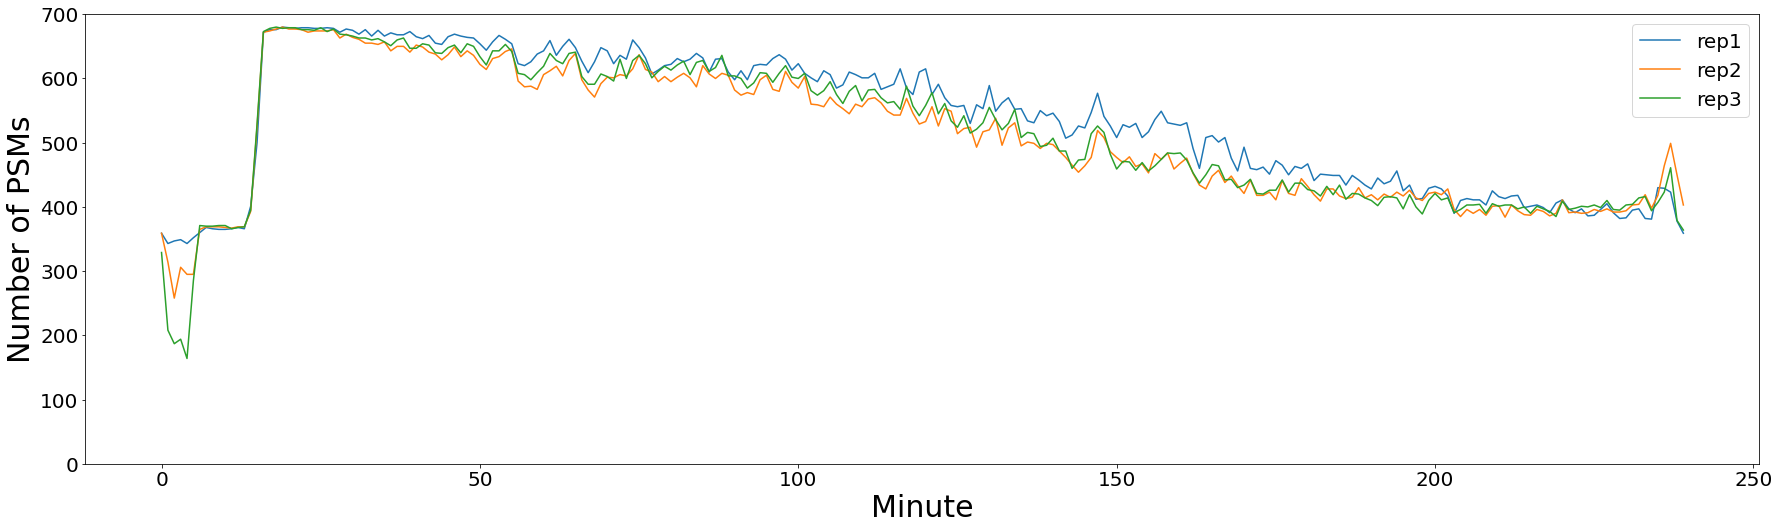

In [32]:
a4_dims = (30, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=all_bulk, x="minute", y="ms2_1")
sns.lineplot(data=all_bulk, x="minute", y="ms2_2")
sns.lineplot(data=all_bulk, x="minute", y="ms2_3")
ax.legend(['rep1','rep2','rep3'],fontsize='20')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
# plt.title('All acquired ms2 spectra ',fontsize='20')
plt.ylabel('Number of PSMs', fontsize=30)
plt.xlabel('Minute', fontsize=30)
plt.savefig('psm_over_time_bulk.png', dpi=300)
plt.ylim(0,700)
plt.show()

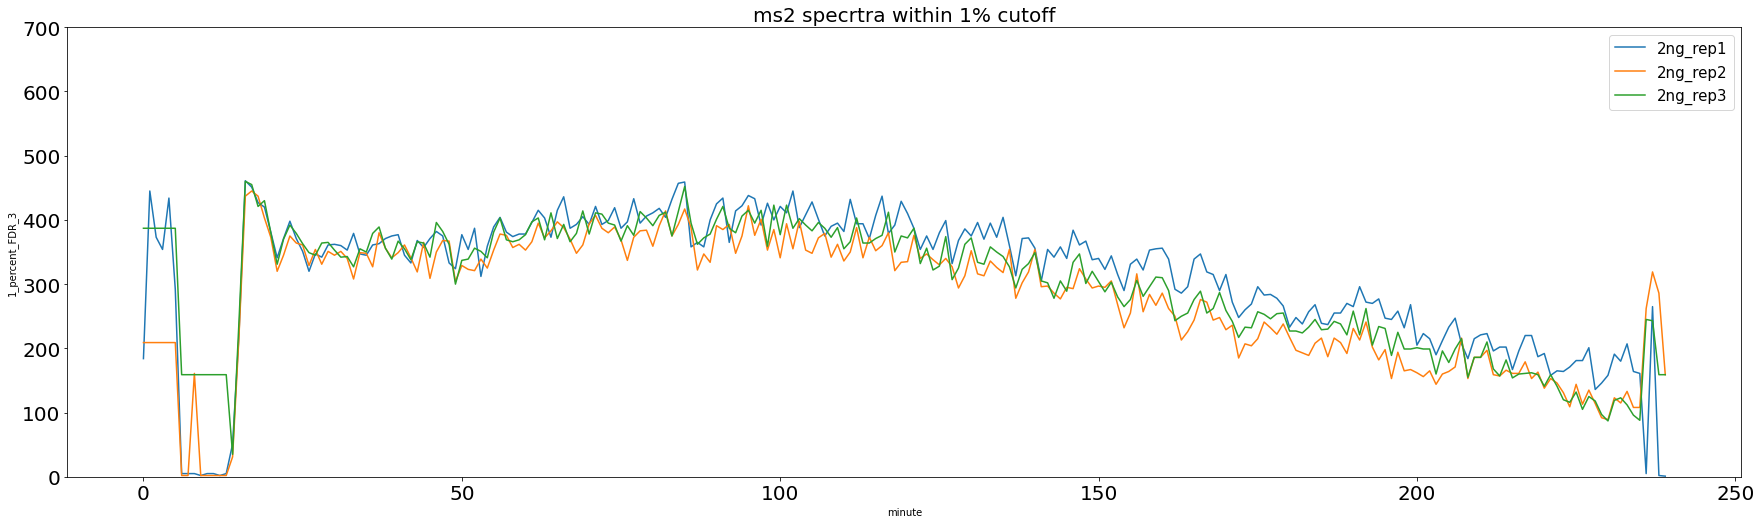

In [8]:
a4_dims = (30, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=all_bulk, x="minute", y="1_percent_FDR_1")
sns.lineplot(data=all_bulk, x="minute", y="1_percent_FDR_2")
sns.lineplot(data=all_bulk, x="minute", y="1_percent_FDR_3")
ax.legend(['2ng_rep1','2ng_rep2','2ng_rep3'],fontsize='15')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.title('ms2 specrtra within 1% cutoff',fontsize='20')
plt.ylim(0,700)
plt.show()

In [26]:
list_of_file_names = ['2ng_rep1', '2ng_rep2','2ng_rep3','2ng_rep4','2ng_rep5','2ng_rep6']
all_2ng = get_data_for_all_files(list_of_file_names)

<ipython-input-26-62e7affc5d56>:2: DtypeWarning: Columns (12,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  all_2ng = get_data_for_all_files(list_of_file_names)
<ipython-input-26-62e7affc5d56>:2: DtypeWarning: Columns (21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  all_2ng = get_data_for_all_files(list_of_file_names)
<ipython-input-26-62e7affc5d56>:2: DtypeWarning: Columns (12,21) have mixed types.Specify dtype option on import or set low_memory=False.
  all_2ng = get_data_for_all_files(list_of_file_names)
<ipython-input-26-62e7affc5d56>:2: DtypeWarning: Columns (21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  all_2ng = get_data_for_all_files(list_of_file_names)
<ipython-input-26-62e7affc5d56>:2: DtypeWarning: Columns (12,20,21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  all_2ng = get_data_for_all_files(list_of_file_names)

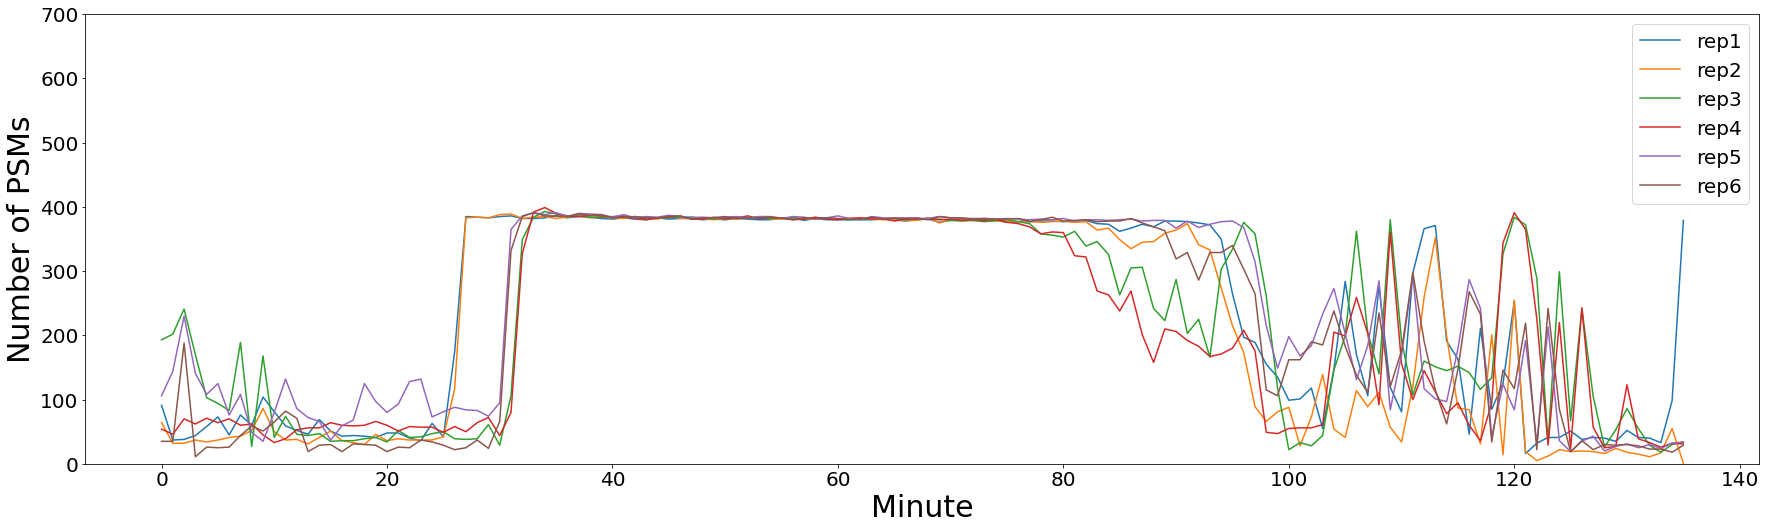

In [33]:
a4_dims = (30, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=all_2ng, x="minute", y="ms2_1")
sns.lineplot(data=all_2ng, x="minute", y="ms2_2")
sns.lineplot(data=all_2ng, x="minute", y="ms2_3")
sns.lineplot(data=all_2ng, x="minute", y="ms2_4")
sns.lineplot(data=all_2ng, x="minute", y="ms2_5")
sns.lineplot(data=all_2ng, x="minute", y="ms2_6")
ax.legend(['rep1','rep2','rep3','rep4','rep5','rep6'],fontsize='20')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
# plt.title('All acquired ms2 spectra ',fontsize='20')
plt.ylabel('Number of PSMs', fontsize=30)
plt.xlabel('Minute', fontsize=30)
plt.ylim(0,700)
plt.savefig('psm_over_time_2ng.png', dpi=300)
plt.show()

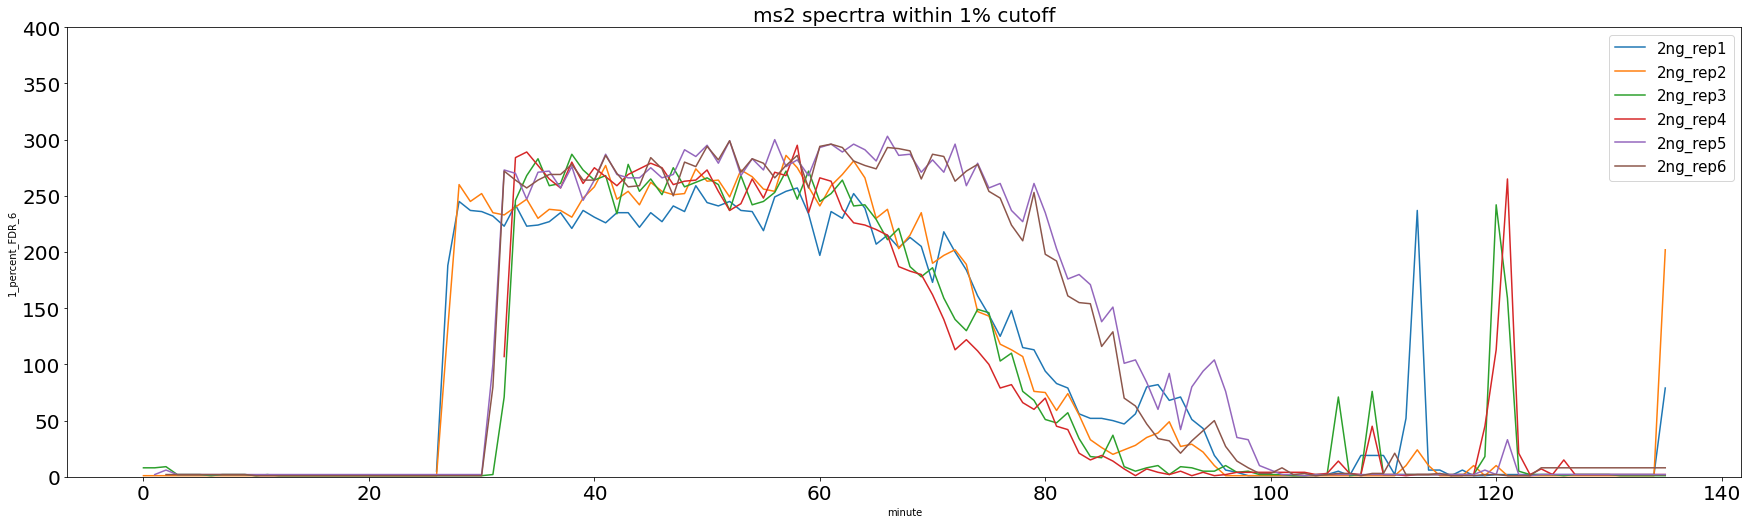

In [11]:
a4_dims = (30, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=all_2ng, x="minute", y="1_percent_FDR_1")
sns.lineplot(data=all_2ng, x="minute", y="1_percent_FDR_2")
sns.lineplot(data=all_2ng, x="minute", y="1_percent_FDR_3")
sns.lineplot(data=all_2ng, x="minute", y="1_percent_FDR_4")
sns.lineplot(data=all_2ng, x="minute", y="1_percent_FDR_5")
sns.lineplot(data=all_2ng, x="minute", y="1_percent_FDR_6")
ax.legend(['2ng_rep1','2ng_rep2','2ng_rep3','2ng_rep4','2ng_rep5','2ng_rep6'],fontsize='15')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.title('ms2 specrtra within 1% cutoff',fontsize='20')
plt.ylim(0,400)
plt.show()

In [30]:
list_of_file_names = ['0.2ng_rep1','0.2ng_rep2','0.2ng_rep3','0.2ng_rep4','0.2ng_rep5','0.2ng_rep6']
all_02ng = get_data_for_all_files(list_of_file_names)

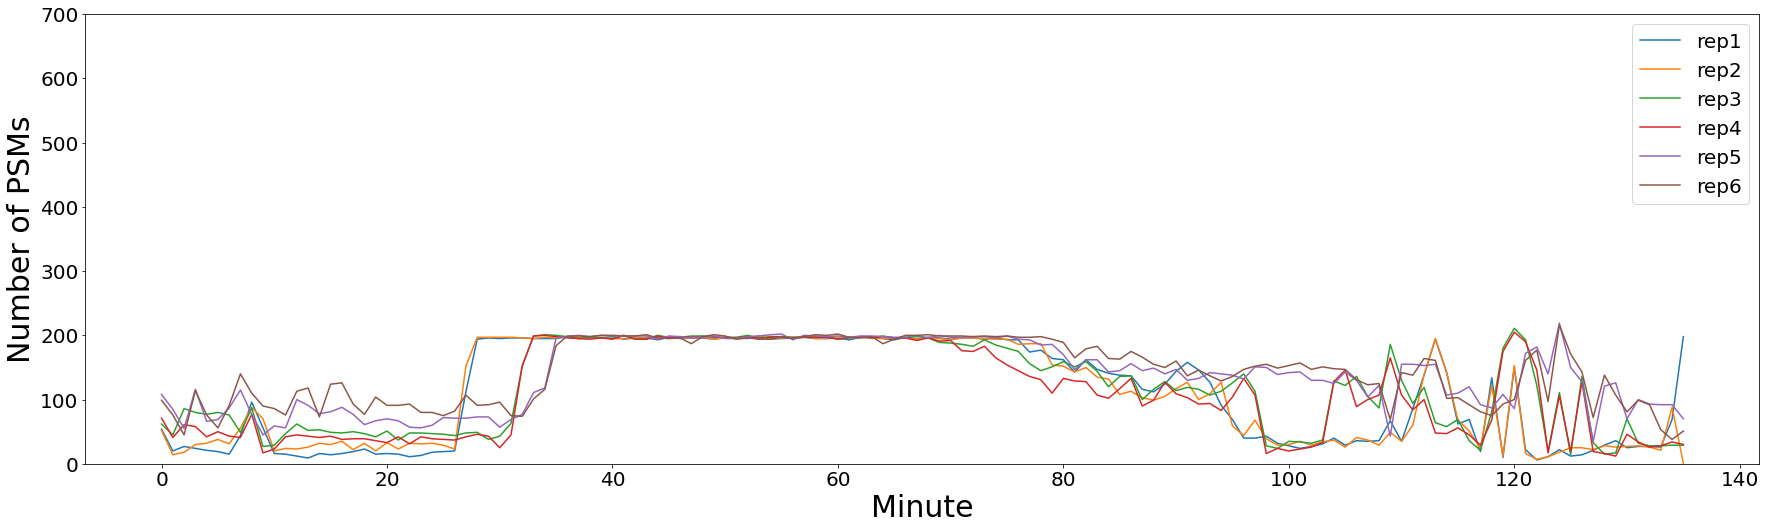

In [34]:
a4_dims = (30, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=all_02ng, x="minute", y="ms2_1")
sns.lineplot(data=all_02ng, x="minute", y="ms2_2")
sns.lineplot(data=all_02ng, x="minute", y="ms2_3")
sns.lineplot(data=all_02ng, x="minute", y="ms2_4")
sns.lineplot(data=all_02ng, x="minute", y="ms2_5")
sns.lineplot(data=all_02ng, x="minute", y="ms2_6")
ax.legend(['rep1','rep2','rep3','rep4','rep5','rep6'],fontsize='20')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
# plt.title('All acquired ms2 spectra ',fontsize='20')
plt.ylabel('Number of PSMs', fontsize=30)
plt.xlabel('Minute', fontsize=30)
plt.ylim(0,700)
plt.savefig('psm_over_time_0.2.png', dpi=300)
plt.show()

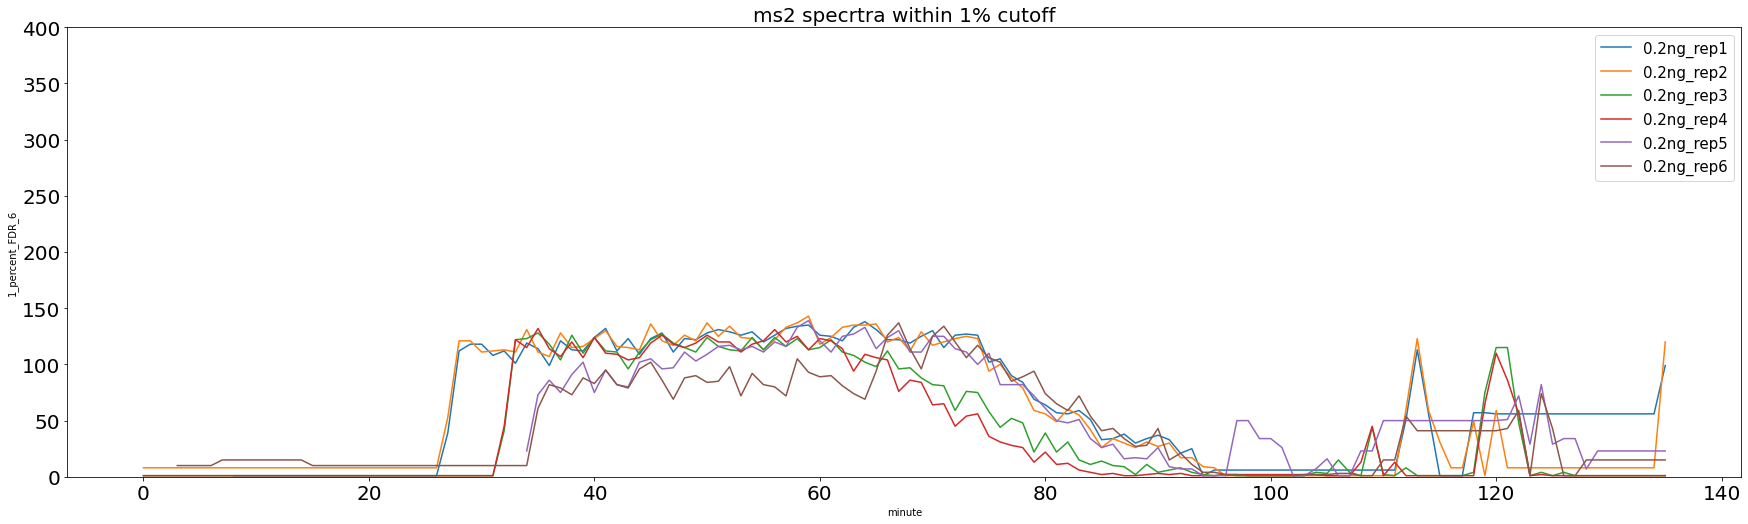

In [14]:
a4_dims = (30, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=all_02ng, x="minute", y="1_percent_FDR_1")
sns.lineplot(data=all_02ng, x="minute", y="1_percent_FDR_2")
sns.lineplot(data=all_02ng, x="minute", y="1_percent_FDR_3")
sns.lineplot(data=all_02ng, x="minute", y="1_percent_FDR_4")
sns.lineplot(data=all_02ng, x="minute", y="1_percent_FDR_5")
sns.lineplot(data=all_02ng, x="minute", y="1_percent_FDR_6")
ax.legend(['0.2ng_rep1','0.2ng_rep2','0.2ng_rep3','0.2ng_rep4','0.2ng_rep5','0.2ng_rep6'],fontsize='15')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.title('ms2 specrtra within 1% cutoff',fontsize='20')
plt.ylim(0,400)
plt.show()

# Find the filter min and max for each file

In [42]:
#for the 2ng replicates at what minute do we start getting a lot of scans (300 range)
all_2ng[['minute','ms2_1']].loc[26:27] #for rep1 at minute 27 scan count (for ms2 spectera)  jumps from 174 to 385 385
all_2ng[['minute','ms2_2']].loc[25:27] #rep2 jumps at #27
all_2ng[['minute','ms2_3']].loc[30:32] #rep3 jumps at 32
all_2ng[['minute','ms2_4']].loc[30:32] #rep4 jumps at 32
all_2ng[['minute','ms2_5']].loc[30:31] #rep5 jumps at 31
all_2ng[['minute','ms2_6']].loc[30:31] #rep6 jumps at 31

,minute,ms2_6
30,30,66.0
31,31,332.0


In [59]:
#for the 2ng replicates at what minute do we stop getting a lot of scans (below 200 scans)
all_2ng[['minute','ms2_1']].loc[95:96] #for rep1 at minute 96 scan count (for ms2 spectera)  
all_2ng[['minute','ms2_2']].loc[95:96] #rep2 jumps at 26
all_2ng[['minute','ms2_3']].loc[92:93] #rep3 jumps at 93
all_2ng[['minute','ms2_4']].loc[90:91] #rep4 jumps at 91
all_2ng[['minute','ms2_5']].loc[98:99] #rep5 jumps at 99
all_2ng[['minute','ms2_6']].loc[97:98] #rep6 jumps at 98

,minute,ms2_6
97,97,265.0
98,98,115.0


In [80]:
#for the 0.2ng replicates at what minute do we start getting a lot of scans (200 range)
all_02ng[['minute','ms2_1']].loc[27:28] #for rep1 at minute 28 scan count (for ms2 spectera)
all_02ng[['minute','ms2_2']].loc[26:27] #rep2 jumps at 27
all_02ng[['minute','ms2_3']].loc[31:32] #rep3 jumps at 32
all_02ng[['minute','ms2_4']].loc[31:32] #rep4 jumps at 32
all_02ng[['minute','ms2_5']].loc[34:35] #rep5 jumps at 35
all_02ng[['minute','ms2_6']].loc[34:35] #rep6 jumps at 35


,minute,ms2_6
34,34,116.0
35,35,184.0


In [110]:
#for the 0.2ng replicates at what minute do we stop getting a lot of scans (below 100 scans)
all_02ng[['minute','ms2_1']].loc[93:94] #for rep1 at minute 94 scan count (for ms2 spectera)  
all_02ng[['minute','ms2_2']].loc[94:95] #rep2 jumps at 95
all_02ng[['minute','ms2_3']].loc[97:98] #rep3 jumps at 98
all_02ng[['minute','ms2_4']].loc[97:98] #rep4 jumps at 98
all_02ng[['minute','ms2_5']].loc[108:109] #rep5 jumps at 109
all_02ng[['minute','ms2_6']].loc[108:109] #rep6 jumps at 98

,minute,ms2_6
108,108,125.0
109,109,69.0


# 2ng

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (12,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


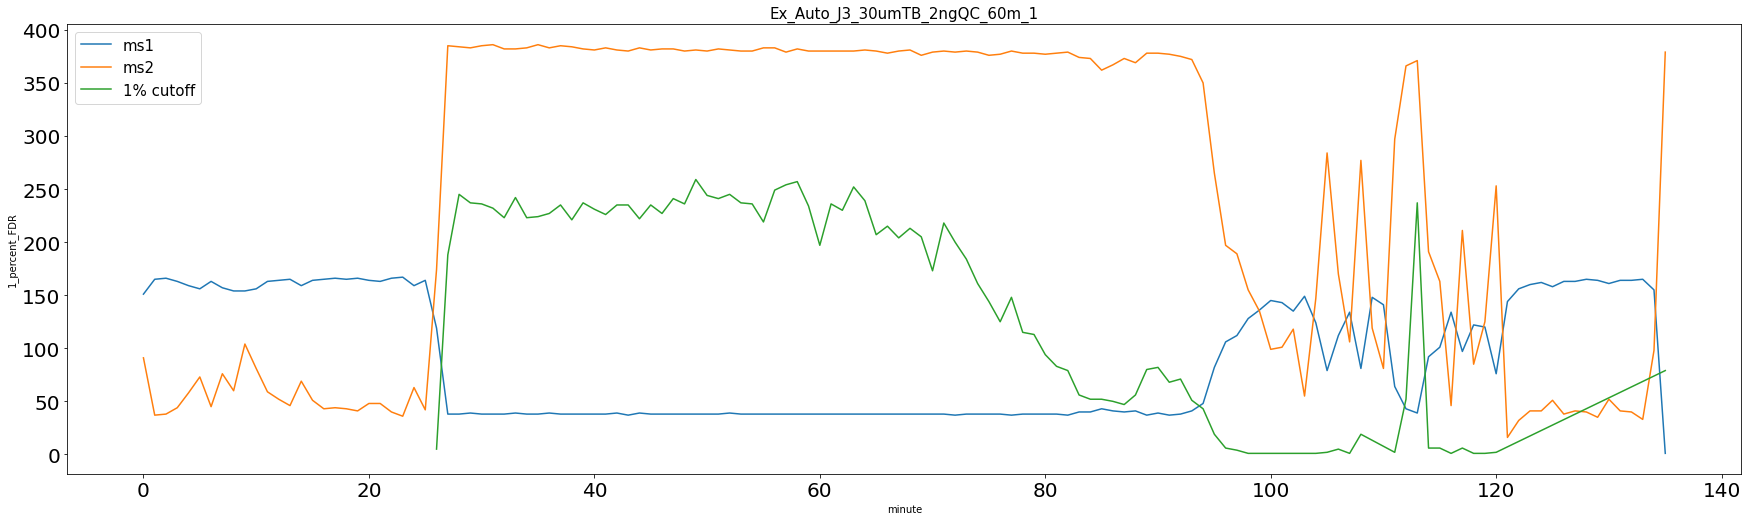

In [15]:
df = get_data_for_one("2ng_rep1")
plot_psm_over_time(df, 'Ex_Auto_J3_30umTB_2ngQC_60m_1')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


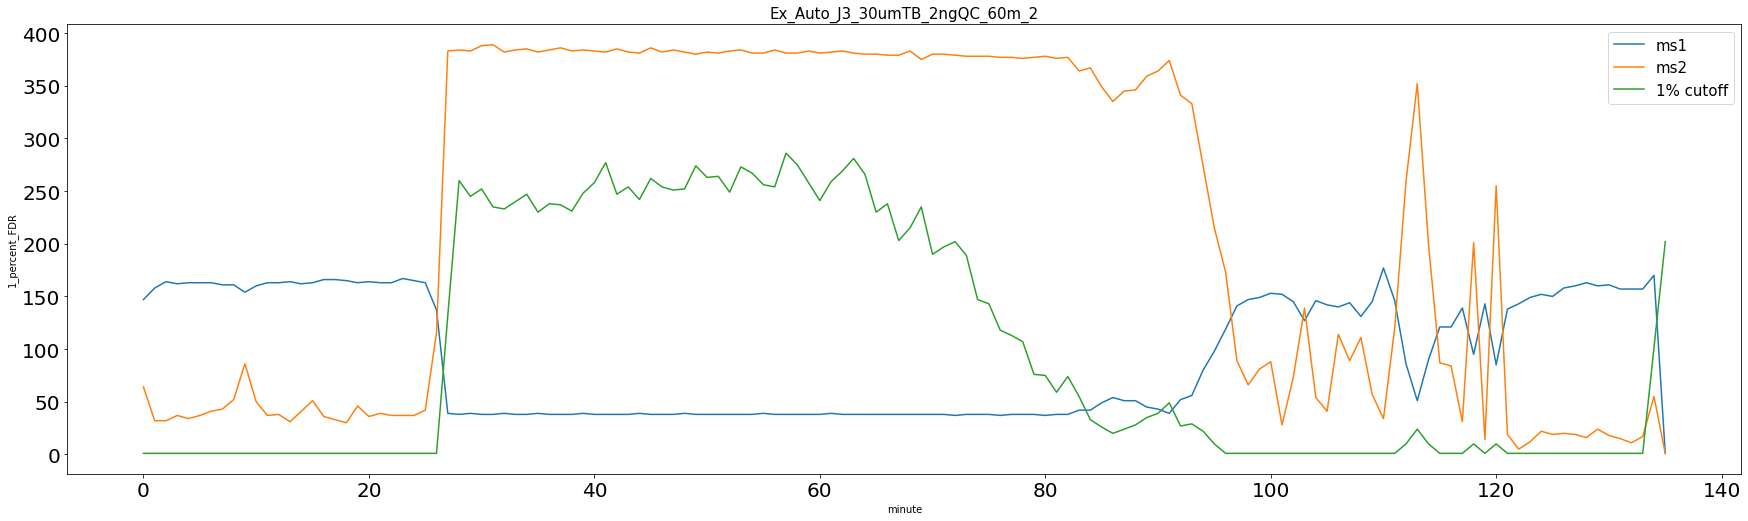

In [16]:
line_df = get_data_for_one("2ng_rep2")
plot_psm_over_time(line_df, 'Ex_Auto_J3_30umTB_2ngQC_60m_2')

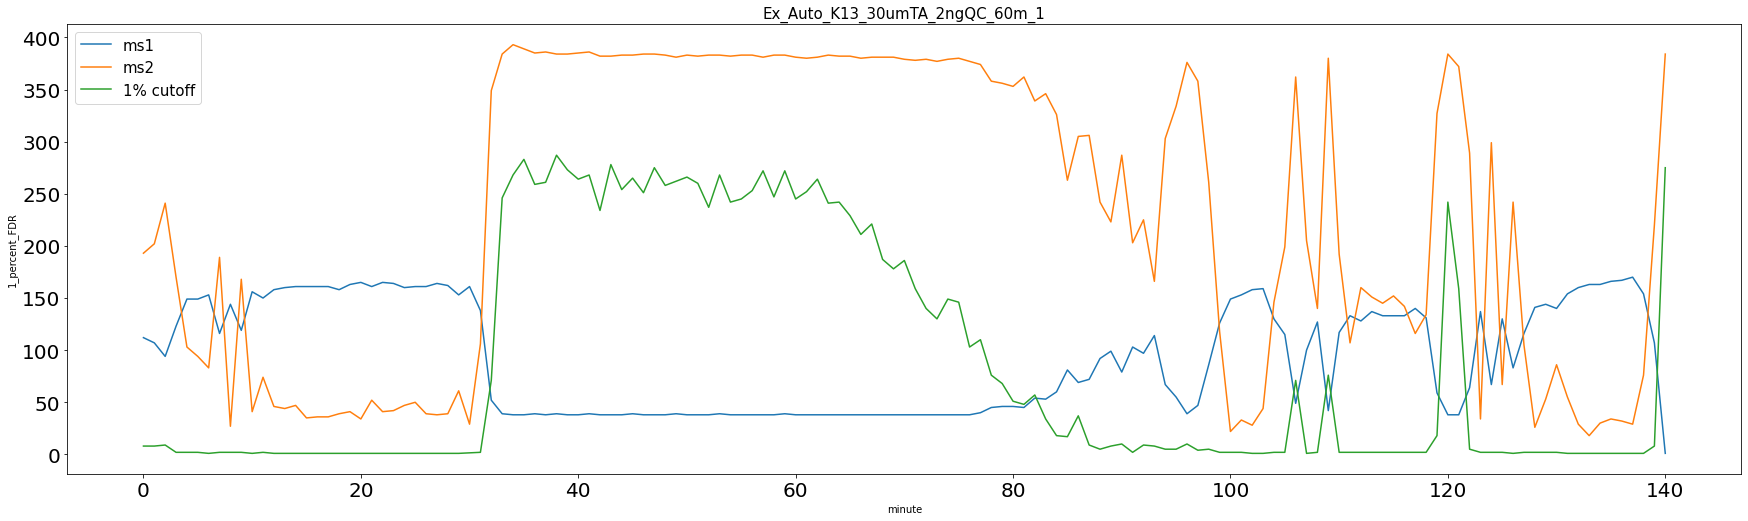

In [17]:
line_df = get_data_for_one("2ng_rep3")
plot_psm_over_time(line_df, 'Ex_Auto_K13_30umTA_2ngQC_60m_1')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (12,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


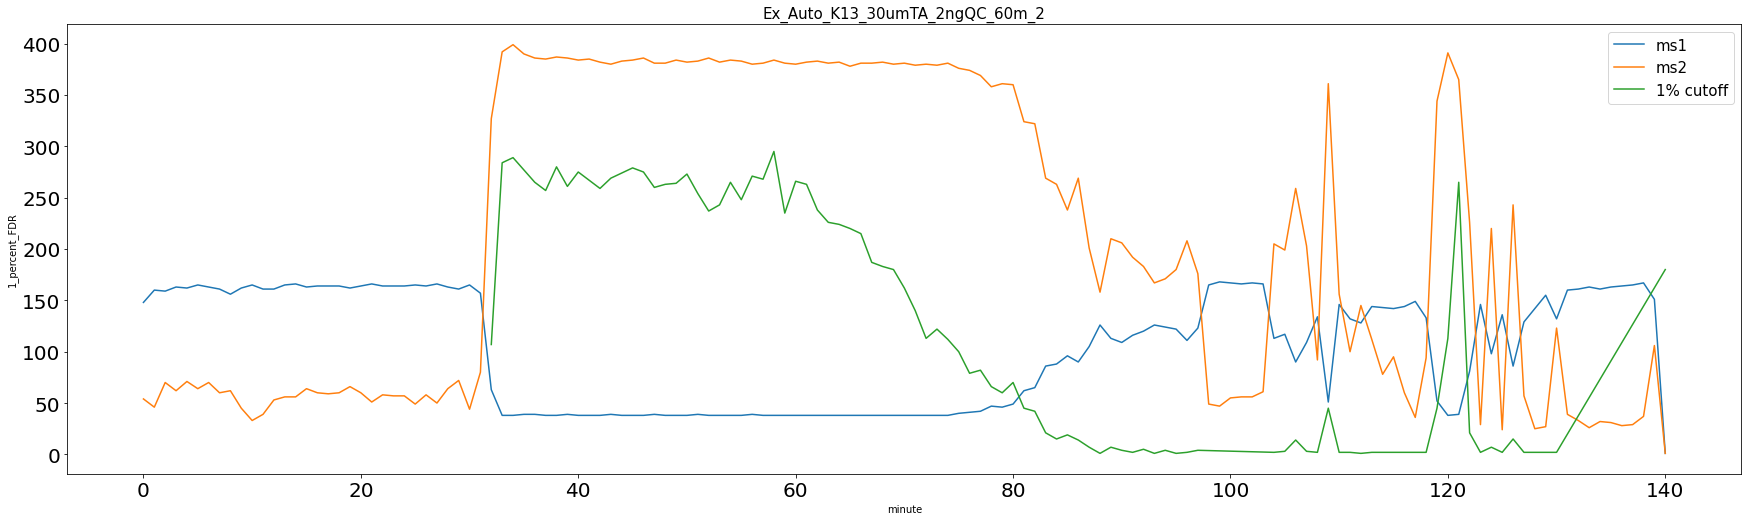

In [18]:
line_df = get_data_for_one("2ng_rep4")
plot_psm_over_time(line_df, 'Ex_Auto_K13_30umTA_2ngQC_60m_2')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


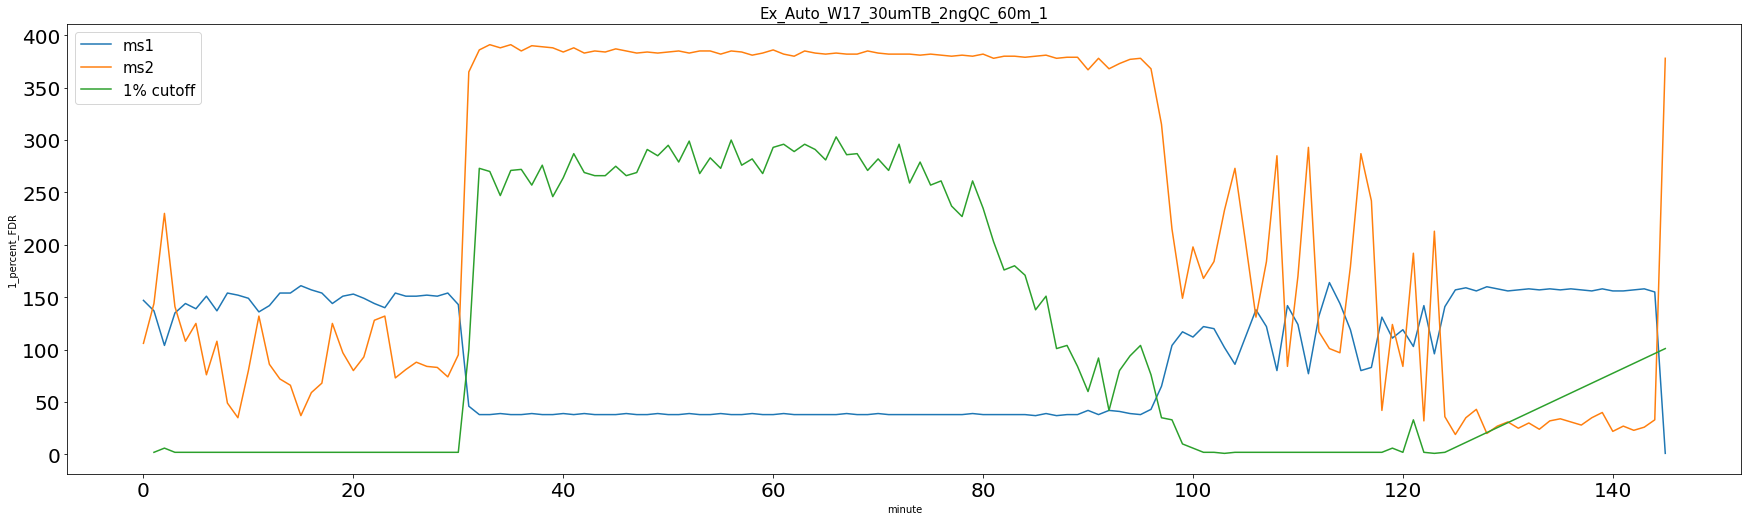

In [19]:
line_df = get_data_for_one("2ng_rep5")
plot_psm_over_time(line_df, 'Ex_Auto_W17_30umTB_2ngQC_60m_1')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (12,20,21,22,23,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


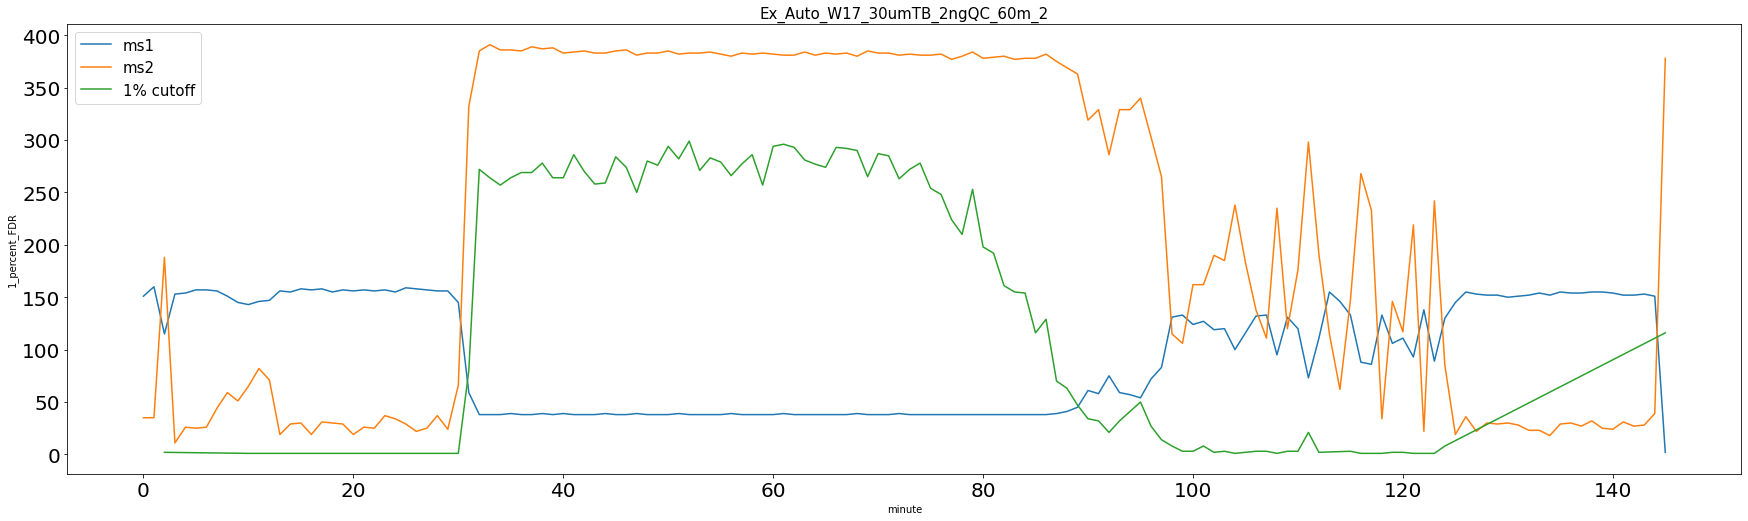

In [20]:
line_df = get_data_for_one("2ng_rep6")
plot_psm_over_time(line_df, 'Ex_Auto_W17_30umTB_2ngQC_60m_2')

# 0.2ng

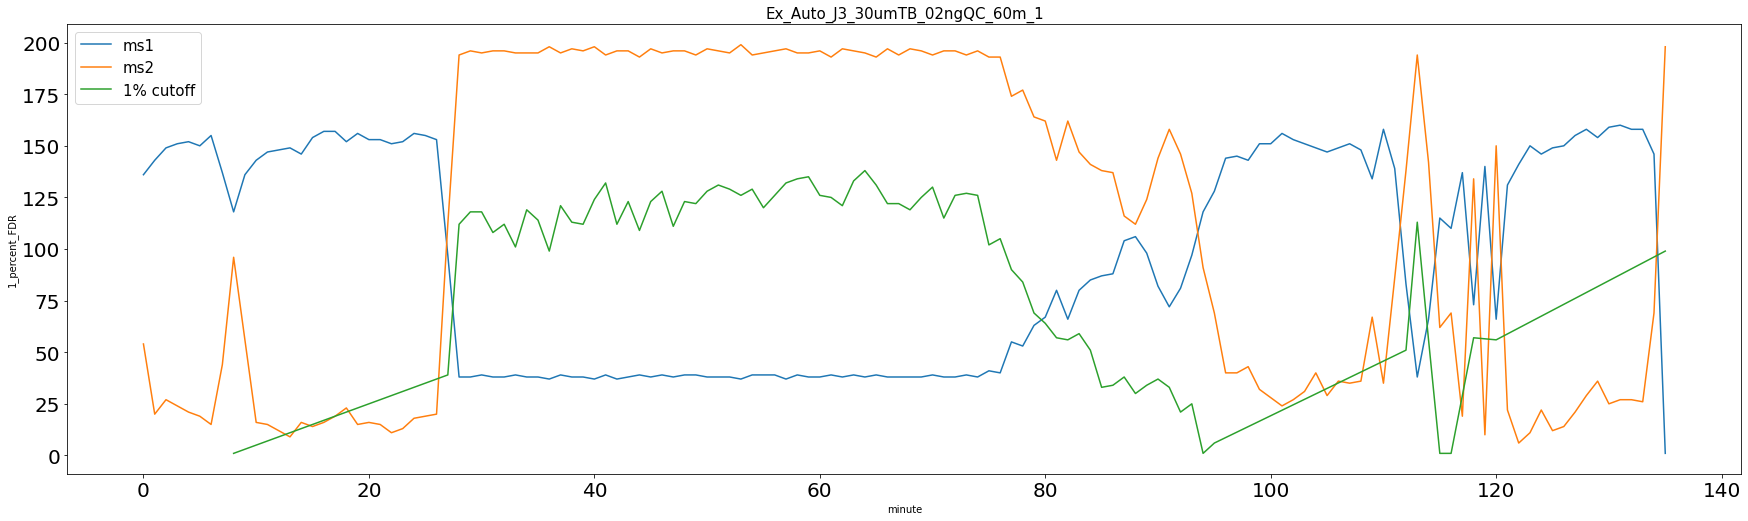

In [21]:
line_df = get_data_for_one("0.2ng_rep1")
plot_psm_over_time(line_df, 'Ex_Auto_J3_30umTB_02ngQC_60m_1')

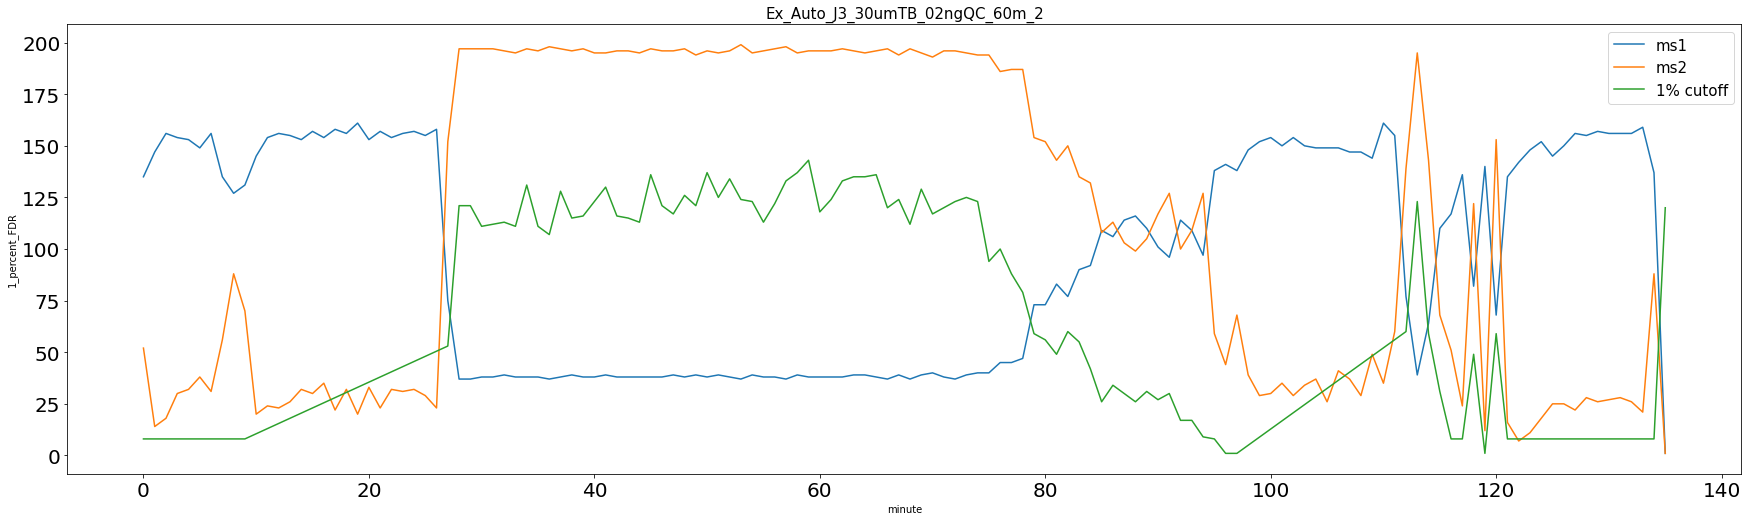

In [22]:
line_df = get_data_for_one("0.2ng_rep2")
plot_psm_over_time(line_df, 'Ex_Auto_J3_30umTB_02ngQC_60m_2')

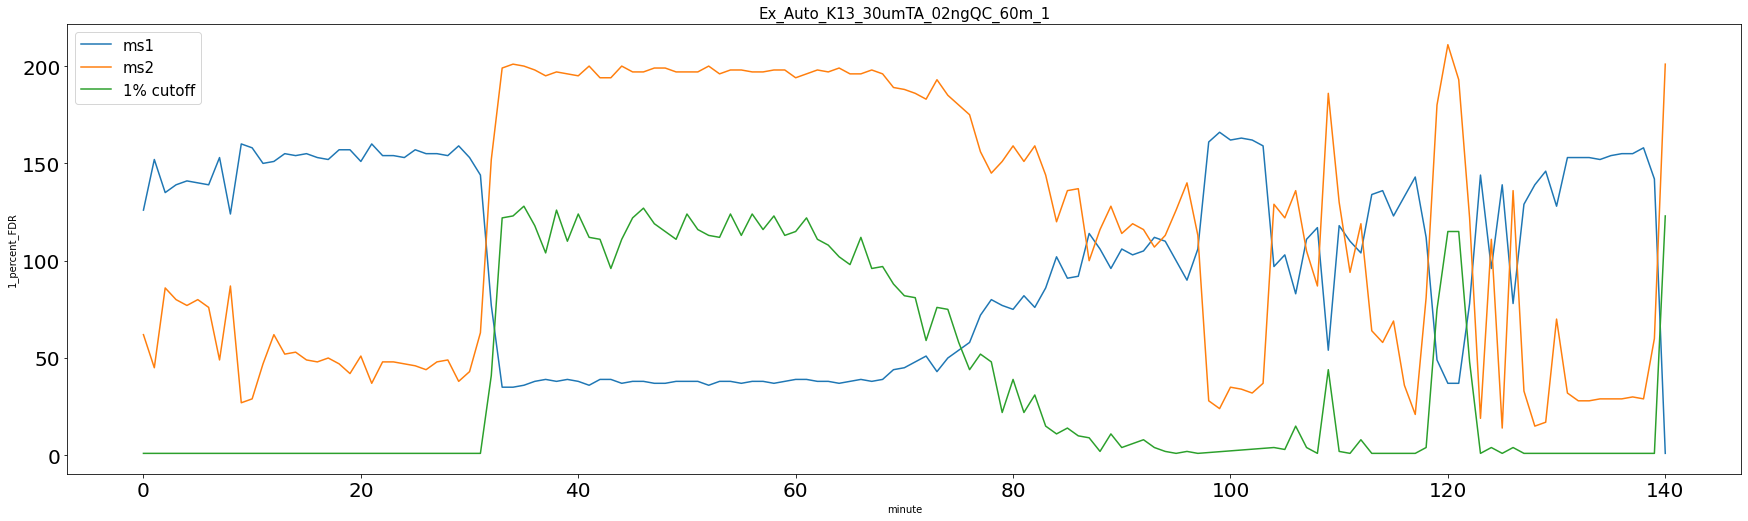

In [23]:
line_df = get_data_for_one("0.2ng_rep3")
plot_psm_over_time(line_df, 'Ex_Auto_K13_30umTA_02ngQC_60m_1')

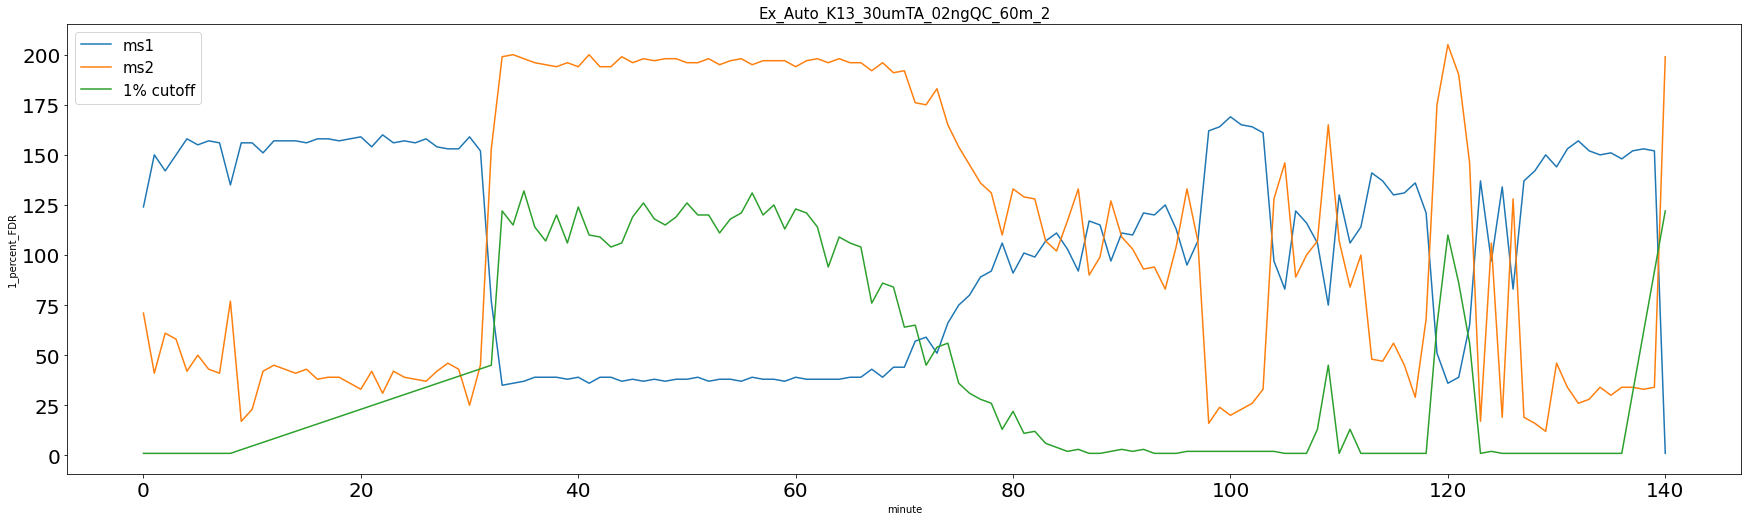

In [24]:
line_df = get_data_for_one("0.2ng_rep4")
plot_psm_over_time(line_df, 'Ex_Auto_K13_30umTA_02ngQC_60m_2')

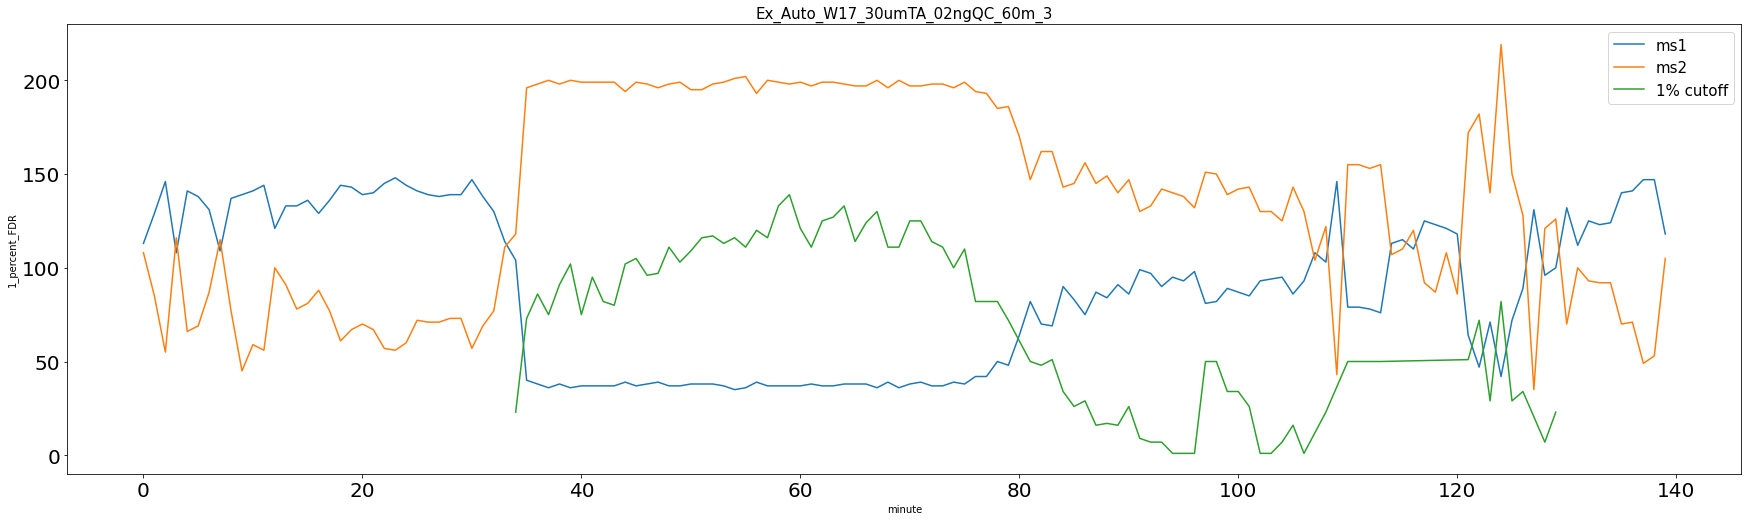

In [25]:
line_df = get_data_for_one("0.2ng_rep5")
plot_psm_over_time(line_df, 'Ex_Auto_W17_30umTA_02ngQC_60m_3')

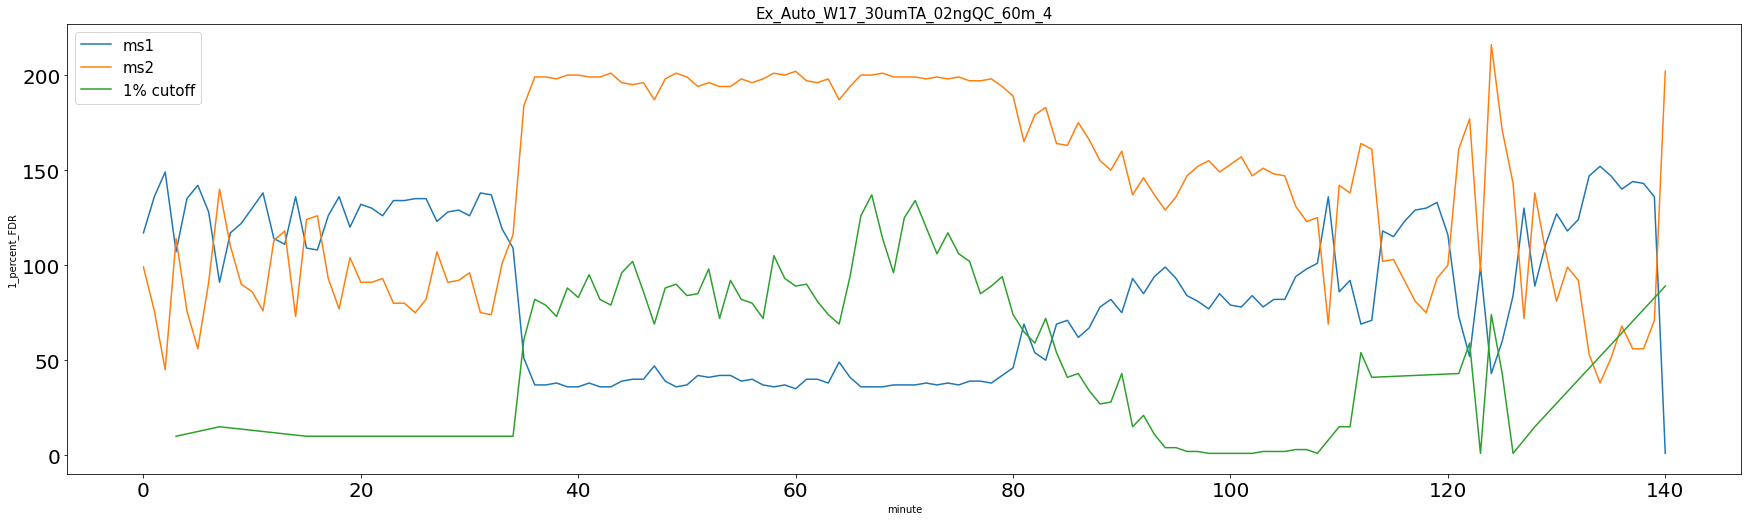

In [26]:
line_df = get_data_for_one("0.2ng_rep6")
plot_psm_over_time(line_df, 'Ex_Auto_W17_30umTA_02ngQC_60m_4')

## Spot checking so that we know it's working correctly

In [27]:
#Read in mzml 
mzml_df = dl.load_parsed_mzml('.2ng_rep5')
ms1 = mzml_df[mzml_df["ms_level"]==1]
ms2 = mzml_df[mzml_df["ms_level"]==2]

#Read in psm
mm_df = dl.load_joined_psm_mzml('.2ng_rep5')
mm_df= mm_df.sort_values("minute")

#MM scan below 1% cutoff
mm_df_cut = mm_df[mm_df['probability'] <=.01]

AttributeError: module 'data_loader' has no attribute 'load_parsed_mzml'

In [ ]:
len(ms1[ms1['minute']==50])

In [ ]:
len(ms2[ms2['minute']==50])

In [ ]:
len(mm_df_cut[mm_df_cut['minute']==50])

In [ ]:
#Read in mzml 
mzml_df = dl.load_parsed_mzml('.2ng_rep5')
ms1 = mzml_df[mzml_df["ms_level"]==1]
ms2 = mzml_df[mzml_df["ms_level"]==2]

#Read in psm
mm_df = dl.load_joined_psm_mzml('.2ng_rep5')
mm_df= mm_df.sort_values("minute")

#MM scan below 1% cutoff
mm_df_cut = mm_df[mm_df['probability'] <=.01]

 #make df with all types
line_df_ms1 = ms1['minute']
line_df_ms1 = line_df_ms1.value_counts().rename_axis('minute').reset_index(name='counts') #since you're look at # of scans per minute, we just need to counts rows

line_df_ms2 = ms2['minute']
line_df_ms2 = line_df_ms2.value_counts().rename_axis('minute').reset_index(name='counts')

line_df_mm_cut = mm_df_cut['minute']
line_df_mm_cut = line_df_mm_cut.value_counts().rename_axis('minute').reset_index(name='counts')

line_df = pd.merge(line_df_ms1, line_df_ms2, on='minute', how='left').fillna(method='ffill')
line_df = line_df.rename({'counts_x': 'ms1', 'counts_y': 'ms2'}, axis=1)
line_df = pd.merge(line_df, line_df_mm_cut, on='minute', how='left').fillna(method='ffill')
line_df = line_df.rename({'counts': '1_percent_FDR'}, axis=1)

#get order for minutes
my_order = [range(0,136)]
line_df = line_df.sort_values("minute")

line_df

In [ ]:
line_df[line_df['minute']==50]

In [ ]:
line_df = get_data_for_one(".2ng_rep5")
line_df[line_df['minute']==50]